In [100]:
import numpy as np
from sklearn.neighbors import DistanceMetric
import torch

In [101]:
dist = DistanceMetric.get_metric('euclidean')

In [102]:
X = [[0, 1, 2],
      [3, 4, 5]]

In [103]:
dist.pairwise(X)


array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [104]:
a = np.random.rand(2)
b = np.random.rand(2)

In [105]:
2 * np.arctanh(np.linalg.norm(b))

0.5742599056445307

In [76]:
def hyp_dist(u, v):
    squnorm = np.clip(np.sum(u * u, axis=-1), 0, 1 - 1e-7)
    sqvnorm = np.clip(np.sum(v * v, axis=-1), 0, 1 - 1e-7)
    sqdist = np.sum(((u - v) ** 2), axis=-1)
    x = sqdist / ((1 - squnorm) * (1 - sqvnorm)) * 2 + 1
    # arcosh
    z = np.sqrt((x ** 2) - 1)
    return np.log(x + z)


def hyp_dist2(u, v):
    squnorm = np.clip(np.sum(u * u, axis=-1), 0, 1 - 1e-7)
    sqvnorm = np.clip(np.sum(v * v, axis=-1), 0, 1 - 1e-7)
    sqdist = np.sum(((u - v) ** 2), axis=-1)
    divisor = np.maximum(1 - squnorm, MACHINE_EPSILON) * np.maximum(1 - sqvnorm, MACHINE_EPSILON) 
    x = 1 + 2 * sqdist / divisor
    return np.arccosh(x)

In [77]:
print(hyp_dist(0,b))
print(hyp_dist2(0,b))

2.972437610314813
2.972437610314813


In [63]:
hd = DistanceMetric.get_metric(hyp_dist)

In [64]:
hd.pairwise(X)

array([[ 0.        , 36.91832253],
       [36.91832253,  0.        ]])

In [47]:
import pickle

with open("../data/pos_encodings/Citeseer_HYPS16.pkl", "rb") as f:
    emb = pickle.load(f)
    

In [49]:
emb.min()

tensor(-0.4879)

In [50]:
emb.max()

tensor(0.4783)

In [51]:
emb[0]

tensor([-0.0154,  0.1136, -0.0237, -0.2436, -0.1210, -0.0696, -0.0670,  0.1701,
         0.2113, -0.0023,  0.0801,  0.1469,  0.2992, -0.0951,  0.0516,  0.1117])

In [54]:
emb

tensor([[-0.0154,  0.1136, -0.0237,  ..., -0.0951,  0.0516,  0.1117],
        [-0.3709,  0.1344,  0.0794,  ..., -0.0049, -0.0314,  0.0347],
        [ 0.1237, -0.0633,  0.2206,  ..., -0.0641, -0.2726, -0.1873],
        ...,
        [ 0.1887, -0.0788, -0.0356,  ...,  0.0811,  0.2925, -0.3067],
        [-0.1772, -0.0112, -0.2764,  ...,  0.2443,  0.1043,  0.2552],
        [-0.1186, -0.0708, -0.0788,  ...,  0.0155,  0.2685, -0.0450]])

In [68]:
distances = hd.pairwise(emb.detach().numpy())

In [69]:
distances.shape

(2120, 2120)

In [70]:
distances.max()

3.089587562621557

In [71]:
distances.min()

0.0

In [63]:
np.histogram(distances)

(array([   7428,   12572,   23236,   49802,  170082,  694804, 1694556,
        1474770,  357550,    9600]),
 array([0.        , 0.12696899, 0.25393797, 0.38090696, 0.50787594,
        0.63484493, 0.76181391, 0.8887829 , 1.01575188, 1.14272087,
        1.26968986]))

(array([[3.000e+00, 2.000e+00, 4.000e+00, ..., 8.400e+02, 4.900e+01,
         0.000e+00],
        [3.000e+00, 2.000e+00, 2.000e+00, ..., 8.990e+02, 5.850e+02,
         7.000e+00],
        [2.000e+00, 3.000e+00, 1.000e+00, ..., 1.120e+03, 2.610e+02,
         0.000e+00],
        ...,
        [3.000e+00, 2.000e+00, 9.000e+00, ..., 9.410e+02, 5.120e+02,
         1.400e+01],
        [1.000e+00, 0.000e+00, 2.000e+00, ..., 9.800e+02, 2.120e+02,
         0.000e+00],
        [3.000e+00, 0.000e+00, 0.000e+00, ..., 1.043e+03, 5.340e+02,
         1.700e+01]]),
 array([0.        , 0.30895876, 0.61791751, 0.92687627, 1.23583503,
        1.54479378, 1.85375254, 2.16271129, 2.47167005, 2.78062881,
        3.08958756]),
 <a list of 2120 BarContainer objects>)

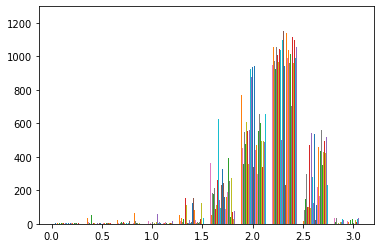

In [72]:
import matplotlib.pyplot as plt

plt.hist(distances)

In [74]:
np.sum(distances - distances.T)

0.0

In [81]:
thresh = 1.5

np.sum(distances<thresh, axis=1)

array([77, 16, 13, ..., 81, 38,  4])

(array([1.466e+03, 2.970e+02, 9.900e+01, 6.900e+01, 7.800e+01, 7.200e+01,
        2.300e+01, 1.100e+01, 4.000e+00, 1.000e+00]),
 array([  1.,  50.,  99., 148., 197., 246., 295., 344., 393., 442., 491.]),
 <BarContainer object of 10 artists>)

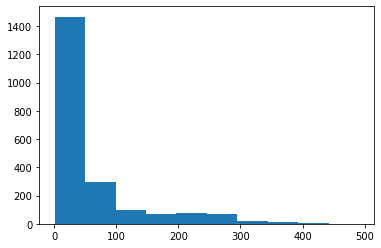

In [84]:
plt.hist(np.sum(distances<thresh, axis=1))

In [85]:
np.sum(distances<thresh)

122108

In [65]:
def hyp_dist(u, v):
    squnorm = np.clip(np.sum(u * u, axis=-1), 0, 1 - 1e-7)
    sqvnorm = np.clip(np.sum(v * v, axis=-1), 0, 1 - 1e-7)
    sqdist = np.sum(((u - v) ** 2), axis=-1)
    x = sqdist / ((1 - squnorm) * (1 - sqvnorm)) * 2 + 1
    return np.arccosh(x)
#     # arcosh
#     z = np.sqrt((x ** 2) - 1)
#     return np.log(x + z)

hd = DistanceMetric.get_metric(hyp_dist)

In [91]:
import time

dataset = "Cora"

for emb_dim in [16, 8, 4, 2]:

    with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}.pkl", "rb") as f:
        emb = pickle.load(f)
    
    t = time.time()
    distances = hd.pairwise(emb.detach().numpy())
    print("Distances calculated in %.2f sec" % (time.time()-t))

    with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}_dists.npy", "wb") as f:
        np.save(f, distances)        

    with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}_dists.pkl", "wb") as f:
        pickle.dump(distances, f)


Distances calculated in 250.83 sec
Distances calculated in 249.26 sec
Distances calculated in 250.38 sec
Distances calculated in 250.99 sec


In [ ]:
'''
Citeseer:
Distances calculated in 177.51 sec
Distances calculated in 176.29 sec
Distances calculated in 179.09 sec
Distances calculated in 182.87 sec

Cora:
Distances calculated in 250.83 sec
Distances calculated in 249.26 sec
Distances calculated in 250.38 sec

'''

In [66]:
# import time

# dataset = "Photo"

# for emb_dim in [16, 8, 4, 2]:

#     with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}.pkl", "rb") as f:
#         emb = pickle.load(f)
    
#     t = time.time()
#     distances = hd.pairwise(emb.detach().numpy())
#     print("Distances calculated in %.2f sec" % (time.time()-t))

#     with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}_dists.npy", "wb") as f:
#         np.save(f, distances)        

#     with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}_dists.pkl", "wb") as f:
#         pickle.dump(distances, f)


In [67]:
import scipy
import pickle

In [68]:
scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, hyp_dist))

array([[ 0.        , 36.91832253],
       [36.91832253,  0.        ]])

In [91]:
### code taken from https://gist.github.com/danielvarga/1f1157085c4d62c4c1e3d282d1e765d3
MACHINE_EPSILON = np.finfo(np.double).eps

def hyperbolize(x, n):
    m = scipy.spatial.distance.squareform(n)
    qsqr = np.sum(x ** 2, axis=1)
    divisor = np.maximum(1 - qsqr[:, np.newaxis], MACHINE_EPSILON) * np.maximum(1 - qsqr[np.newaxis, :], MACHINE_EPSILON)
    m = np.arccosh(1 + 2 * m / divisor ) #** 2
    return m #scipy.spatial.distance.squareform(m, checks=False)

t = time.time()
sqdist = scipy.spatial.distance.pdist(emb.detach().numpy(), "sqeuclidean")
distances_ = hyperbolize(emb.detach().numpy(), sqdist)
print("%.2f" %(time.time()-t))

0.30


In [93]:
np.linalg.norm(distances-distances_)

0.00010990619204749038

In [99]:
import time

dataset = "Pubmed"

for emb_dim in [16, 8, 4, 2]:

    with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}.pkl", "rb") as f:
        emb = pickle.load(f)
    
    t = time.time()
    sqdist = scipy.spatial.distance.pdist(emb.detach().numpy(), "sqeuclidean")
    distances = hyperbolize(emb.detach().numpy(), sqdist)
    print("Distances calculated in %.2f sec" % (time.time()-t))

#     with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}_dists.npy", "wb") as f:
#         np.save(f, distances)        
    with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}_dists.pkl", "wb") as f:
        pickle.dump(distances, f)


Distances calculated in 27.41 sec
Distances calculated in 26.44 sec
Distances calculated in 25.76 sec
Distances calculated in 24.18 sec


In [113]:
dataset = "Citeseer"
emb_dim = 16
with open(f"../data/pos_encodings/{dataset}_RND{emb_dim:02d}.pkl", "rb") as f:
    emb = pickle.load(f)

In [114]:
emb = emb * .49

In [116]:
emb

tensor([[-0.2390, -0.3815, -0.4602,  ...,  0.1128, -0.2359, -0.3657],
        [ 0.3495, -0.2323,  0.1441,  ..., -0.3768,  0.3227,  0.4888],
        [-0.2876,  0.3670, -0.2023,  ..., -0.0987, -0.0723, -0.2664],
        ...,
        [-0.2919, -0.1902,  0.0613,  ..., -0.2800,  0.0747,  0.4413],
        [-0.0087,  0.3539,  0.1754,  ..., -0.4648,  0.3264,  0.0448],
        [-0.1091, -0.4468, -0.3173,  ...,  0.1012, -0.4875,  0.3776]])

In [132]:
sqdist = scipy.spatial.distance.pdist(emb.detach().numpy(), "sqeuclidean")

In [133]:
distances = hyperbolize(emb.detach().numpy(), sqdist)

In [134]:
np.sum(distances-distances.T)

0.0

In [135]:
with open(f"../data/pos_encodings/{dataset}_RND{emb_dim:02d}_dists.pkl", "wb") as f:
    pickle.dump(distances, f)

In [124]:
dataset = "Photo"
emb_dim = 16
with open(f"../data/pos_encodings/{dataset}_HYPS{emb_dim:02d}.pkl", "rb") as f:
    emb = pickle.load(f)

In [125]:
emb

tensor([[ 0.0335, -0.0710,  0.0612,  ...,  0.3164,  0.0414, -0.0190],
        [-0.2200,  0.2930, -0.1840,  ...,  0.0445, -0.0473,  0.0540],
        [ 0.1681,  0.1126,  0.0082,  ...,  0.1166, -0.1998,  0.0319],
        ...,
        [-0.0771,  0.0603,  0.0312,  ..., -0.0999, -0.2962,  0.1865],
        [-0.0178,  0.0230,  0.2101,  ..., -0.1163,  0.0043, -0.1062],
        [ 0.0828, -0.3576,  0.1290,  ..., -0.0385,  0.1909, -0.0871]])

In [127]:
emb = torch.rand(emb.shape)

In [130]:
emb.max()

tensor(1.0000)

In [131]:
with open(f"../data/pos_encodings/{dataset}_RND{emb_dim:02d}.pkl", "wb") as f:
    pickle.dump(emb, f)